In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
#Importing data
l_input_files=['Churn']

cur_dir=os.getcwd()
data_dir=os.path.join(cur_dir,'data','*')
ls_files=[f  for f in glob.glob(data_dir) \
          if (Path(f).stem in l_input_files and os.path.basename(f).endswith('csv')) ]

#print(ls_files)
df=pd.DataFrame()
for f in ls_files:
    print('file to be read: {}'.format(os.path.basename(f)))
    df=pd.read_csv(f)

file to be read: Churn.csv


In [3]:
churn_df=df.copy()

In [4]:
X = churn_df.iloc[:, 3:13]
y = churn_df.iloc[:, 13]

In [5]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [6]:
# Concatenate dummy varaibles to Data Frames and drop features
X=pd.concat([X,geography,gender],axis=1)
X=X.drop(['Geography','Gender'],axis=1)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [8]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

## Building ANN

In [9]:
model_nn = Sequential()

In [10]:
model_nn.add(Dense(units = 6, kernel_initializer= 'he_uniform',activation='relu',input_dim = 11))
model_nn.add(Dense(units = 6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding output layer
model_nn.add(Dense(units = 1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [11]:
model_nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [12]:
model_nn.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [13]:
model_nn_hist=model_nn.fit(X_train, y_train,validation_split=0.3, batch_size = 10, epochs = 100)

Epoch 1/100
560/560 [==============================] - 1s 946us/step - loss: 0.6578 - accuracy: 0.6441 - val_loss: 0.5419 - val_accuracy: 0.7758
Epoch 2/100
560/560 [==============================] - 0s 717us/step - loss: 0.5249 - accuracy: 0.7891 - val_loss: 0.5095 - val_accuracy: 0.7937
Epoch 3/100
560/560 [==============================] - 0s 789us/step - loss: 0.5009 - accuracy: 0.7957 - val_loss: 0.4946 - val_accuracy: 0.7954
Epoch 4/100
560/560 [==============================] - 0s 695us/step - loss: 0.4877 - accuracy: 0.7961 - val_loss: 0.4853 - val_accuracy: 0.7954
Epoch 5/100
560/560 [==============================] - 0s 700us/step - loss: 0.4777 - accuracy: 0.7961 - val_loss: 0.4777 - val_accuracy: 0.7954
Epoch 6/100
560/560 [==============================] - 0s 673us/step - loss: 0.4697 - accuracy: 0.7961 - val_loss: 0.4713 - val_accuracy: 0.7954
Epoch 7/100
560/560 [==============================] - 0s 701us/step - loss: 0.4622 - accuracy: 0.7957 - val_loss: 0.4660 - val_ac

560/560 [==============================] - 0s 832us/step - loss: 0.3421 - accuracy: 0.8587 - val_loss: 0.3685 - val_accuracy: 0.8479
Epoch 58/100
560/560 [==============================] - 0s 846us/step - loss: 0.3416 - accuracy: 0.8582 - val_loss: 0.3681 - val_accuracy: 0.8483
Epoch 59/100
560/560 [==============================] - 0s 825us/step - loss: 0.3412 - accuracy: 0.8595 - val_loss: 0.3676 - val_accuracy: 0.8483
Epoch 60/100
560/560 [==============================] - 0s 830us/step - loss: 0.3409 - accuracy: 0.8596 - val_loss: 0.3672 - val_accuracy: 0.8504
Epoch 61/100
560/560 [==============================] - 0s 766us/step - loss: 0.3405 - accuracy: 0.8595 - val_loss: 0.3669 - val_accuracy: 0.8504
Epoch 62/100
560/560 [==============================] - 0s 798us/step - loss: 0.3400 - accuracy: 0.8600 - val_loss: 0.3666 - val_accuracy: 0.8500
Epoch 63/100
560/560 [==============================] - 0s 871us/step - loss: 0.3400 - accuracy: 0.8596 - val_loss: 0.3661 - val_accuracy

In [39]:
print(model_nn_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


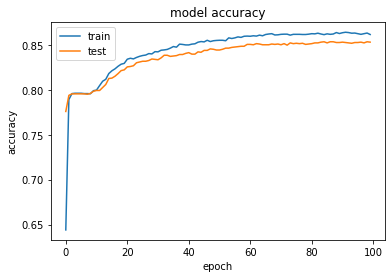

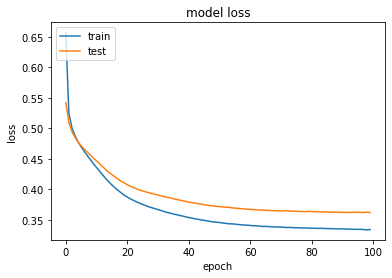

In [41]:
# summarize history for accuracy
plt.plot(model_nn_hist.history['accuracy'])
plt.plot(model_nn_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(model_nn_hist.history['loss'])
plt.plot(model_nn_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Making the predictions and evaluating the model

In [42]:
y_pred = model_nn.predict(X_test)
#y_pred1 = (y_pred > 0.5)

In [43]:
y_pred

array([[0.27797052],
       [0.3749084 ],
       [0.15518397],
       ...,
       [0.21102616],
       [0.1440931 ],
       [0.16912693]], dtype=float32)

In [44]:
y_pred_df = pd.DataFrame(y_pred)

In [45]:
y_pred_df.head()

,0
0,0.277971
1,0.374908
2,0.155184
3,0.090318
4,0.066134


In [46]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Exited
9394,0
898,1
2398,0
5906,0
2343,0


In [47]:
y_test_df['ID'] = y_test_df.index

In [48]:
y_test_df.head()

,Exited,ID
9394,0,9394
898,1,898
2398,0,2398
5906,0,5906
2343,0,2343


In [49]:
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [50]:
y_pred_final = pd.concat([y_test_df,y_pred_df],axis=1)

In [51]:
y_pred_final= y_pred_final.rename(columns={ 0: 'Churn_Prob'})

In [52]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.5 else 0)

In [53]:
y_pred_final.head()

,Exited,ID,Churn_Prob,predicted
0,0,9394,0.277971,0
1,1,898,0.374908,0
2,0,2398,0.155184,0
3,0,5906,0.090318,0
4,0,2343,0.066134,0


In [54]:
confusion = confusion_matrix( y_pred_final.Exited, y_pred_final.predicted )
confusion

array([[1524,   71],
       [ 201,  204]], dtype=int64)

In [55]:
accuracy_score( y_pred_final.Exited, y_pred_final.predicted)

0.864

### ROC Curve

In [56]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

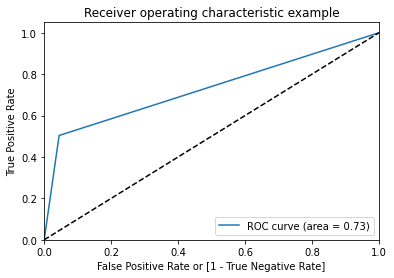

(array([0.        , 0.04451411, 1.        ]),
 array([0.       , 0.5037037, 1.       ]),
 array([2, 1, 0], dtype=int64))

In [57]:
draw_roc(y_pred_final.Exited, y_pred_final.predicted)

In [58]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.Churn_Prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,Exited,ID,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,9394,0.277971,0,1,1,1,0,0,0,0,0,0,0
1,1,898,0.374908,0,1,1,1,1,0,0,0,0,0,0
2,0,2398,0.155184,0,1,1,0,0,0,0,0,0,0,0
3,0,5906,0.090318,0,1,0,0,0,0,0,0,0,0,0
4,0,2343,0.066134,0,1,0,0,0,0,0,0,0,0,0


In [33]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.Exited, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0    0.2025  0.000000  1.000000
0.1   0.1    0.6405  0.571787  0.911111
0.2   0.2    0.7620  0.751724  0.802469
0.3   0.3    0.8170  0.848276  0.693827
0.4   0.4    0.8440  0.910345  0.582716
0.5   0.5    0.8640  0.955486  0.503704
0.6   0.6    0.8620  0.973041  0.424691
0.7   0.7    0.8580  0.988088  0.345679
0.8   0.8    0.8415  0.994984  0.237037
0.9   0.9    0.8200  0.999373  0.113580


<AxesSubplot:xlabel='prob'>

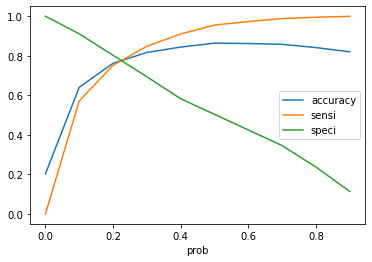

In [34]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

#### From the curve above, 0.4 is the optimum point to take it as a cutoff probability.

In [35]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map( lambda x: 1 if x > 0.4 else 0)

In [36]:
y_pred_final.head()

,Exited,ID,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,9394,0.277971,0,1,1,1,0,0,0,0,0,0,0,0
1,1,898,0.374908,0,1,1,1,1,0,0,0,0,0,0,0
2,0,2398,0.155184,0,1,1,0,0,0,0,0,0,0,0,0
3,0,5906,0.090318,0,1,0,0,0,0,0,0,0,0,0,0
4,0,2343,0.066134,0,1,0,0,0,0,0,0,0,0,0,0


In [37]:
accuracy_score( y_pred_final.Exited, y_pred_final.final_predicted)

0.844

In [38]:
confusion_matrix( y_pred_final.Exited, y_pred_final.final_predicted )

array([[1452,  143],
       [ 169,  236]], dtype=int64)